In [98]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import shap
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.dates as mdates

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [100]:
# Replace these file paths with the paths to your CSV files
file_paths = {
    "code_commits": "token_terminal_data/daily_code_commits.csv",
    "core_developers": "token_terminal_data/daily_core_developers.csv",
    "crv_price": "token_terminal_data/daily_crv_price.csv",
    "crv_token_holders": "token_terminal_data/daily_crv_token_holders.csv",
    "crv_trading_volume": "token_terminal_data/daily_crv_trading_volume.csv",
    "earnings": "token_terminal_data/daily_earnings.csv",
    "expenses": "token_terminal_data/daily_expenses.csv",
    "fees": "token_terminal_data/daily_fees.csv",
    "market_cap_circulating": "token_terminal_data/daily_market_cap_circulating.csv",
    "market_cap_fully_diluted": "token_terminal_data/daily_market_cap_fully_diluted.csv",
    "pf_ratio_circulating": "token_terminal_data/daily_pf_ratio_circulating.csv",
    "pf_ratio_fully_diluted": "token_terminal_data/daily_pf_ratio_fully_diluted.csv",
    "ps_ratio_circulating": "token_terminal_data/daily_ps_ratio_circulating.csv",
    "ps_ratio_fully_diluted": "token_terminal_data/daily_ps_ratio_fully_diluted.csv",
    "revenue": "token_terminal_data/daily_revenue.csv",
    "supplyside_fees": "token_terminal_data/daily_supplyside_fees.csv",
    "token_incentives": "token_terminal_data/daily_token_incentives.csv",
    "trading_volume_on_curve": "token_terminal_data/daily_trading_volume_on_curve.csv",
    "treasury": "token_terminal_data/daily_treasury.csv",
    "tvl": "token_terminal_data/daily_tvl.csv",
    "pool": "token_terminal_data/wbtc_weth_usdt_pool_data.csv"
}


# Initialize an empty DataFrame to merge all datasets
combined_df = None

# Read each file and merge it into the combined DataFrame
for file_label, file_path in file_paths.items():
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Assuming 'date' is the common column across all files
    if combined_df is None:
        combined_df = df
    else:
        combined_df = pd.merge(combined_df, df, on="date", how="outer")

In [101]:
# Filter out the date to only recent dates
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df = combined_df[combined_df['date'] >= '2021-07-13']

In [102]:
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df.set_index('date', inplace=True)
combined_df

,code_commits,core_developers,price,crv_token_holders,crv_trading_volume,earnings,expenses,fees,market_cap_circulating,market_cap_fully_diluted,...,p_f_ratio_fully_diluted,p_s_ratio_circulating,p_s_ratio_fully_diluted,revenue,supply_side_fees,token_incentives,trading_volume,treasury,tvl,pool_transaction_volume
date,,,,,,,,,,,,,,,,,,,,,
2021-07-13,7.0,8.0,1.69,38157.0,7.762510e+07,-995237.42,1086006.61,187808.52,5.965139e+08,5.568778e+09,...,56.03,6.00,56.03,90769.18,97039.34,1086006.61,3.594342e+08,1.979009e+08,9.122609e+09,9.228194e+04
2021-07-14,6.0,8.0,1.60,38229.0,7.870129e+07,-964708.17,1072142.09,220103.04,5.681213e+08,5.272409e+09,...,52.81,5.69,52.81,107433.92,112669.12,1072142.09,1.372398e+08,1.983357e+08,9.110155e+09,1.143057e+06
2021-07-15,14.0,8.0,1.60,38304.0,9.675864e+07,-1481233.20,1613015.58,269250.00,5.547193e+08,5.288100e+09,...,53.54,5.62,53.54,131782.38,137467.62,1613015.58,2.634928e+08,1.865449e+08,8.794049e+09,9.803373e+05
2021-07-16,0.0,8.0,1.49,38403.0,9.411850e+07,-1343571.64,1465070.06,250142.48,5.186236e+08,4.932441e+09,...,50.31,5.29,50.31,121498.42,128644.07,1465070.06,2.990595e+08,1.755983e+08,8.716785e+09,1.068036e+06
2021-07-17,9.0,8.0,1.42,38479.0,9.220810e+07,-901834.19,995671.55,193723.80,4.949585e+08,4.695484e+09,...,49.73,5.24,49.73,93837.36,99886.43,995671.55,1.043261e+08,1.764642e+08,8.620425e+09,1.012338e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-17,9.0,26.0,0.57,81401.0,1.157763e+08,-194123.91,228436.46,139614.18,5.223510e+08,1.889076e+09,...,38.66,10.69,38.66,34312.55,105301.63,228436.46,1.182187e+08,7.176703e+07,1.960972e+09,2.107918e+07
2023-11-18,2.0,27.0,0.57,81436.0,1.096275e+08,-311522.21,340263.13,59980.32,5.203818e+08,1.871139e+09,...,38.86,10.81,38.86,28740.91,31239.41,340263.13,1.205042e+08,7.000889e+07,3.917851e+09,1.481089e+07
2023-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.254476e+07


In [103]:
# Handle missing values
combined_df = combined_df.fillna(method='ffill')  # Forward fill to handle missing values

# Remove duplicates
combined_df = combined_df[~combined_df.index.duplicated(keep='first')]

# Correct data types if necessary
combined_df.index = pd.to_datetime(combined_df.index)

## Decompose CRV Token Holders

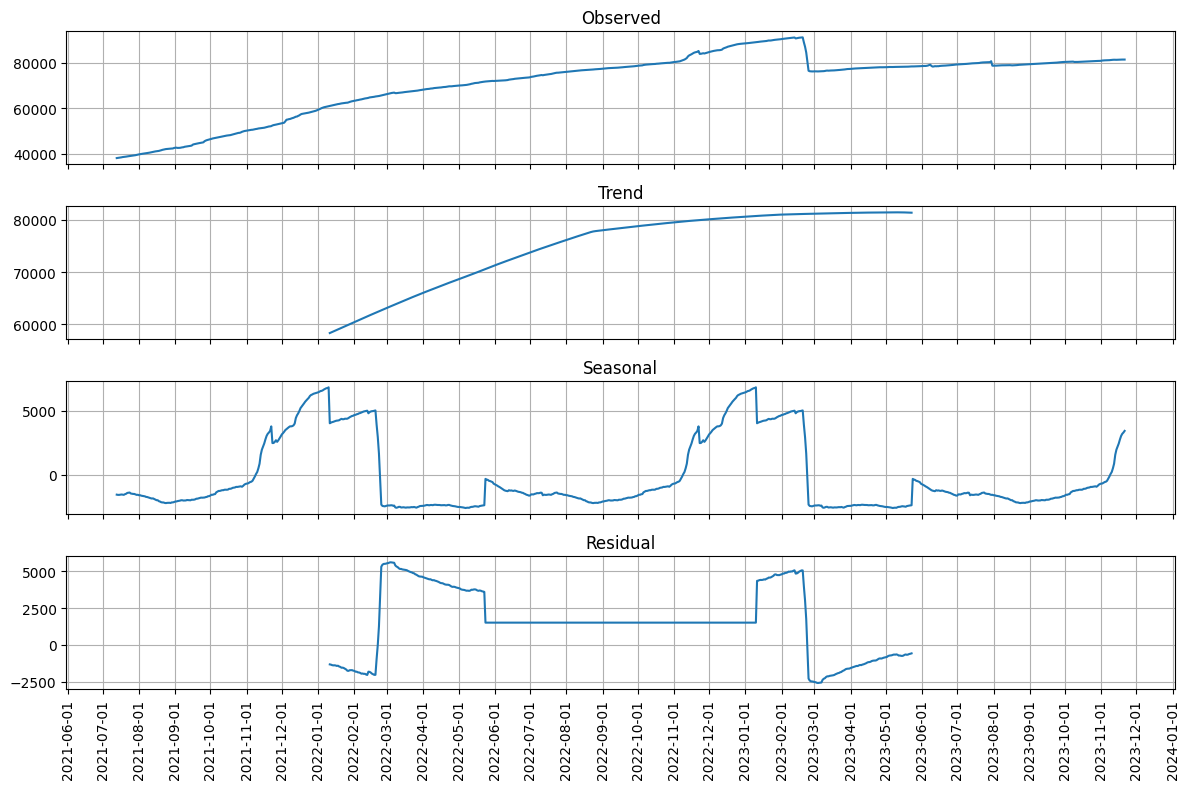

In [104]:
decomposition = seasonal_decompose(combined_df['crv_token_holders'], model='additive', period=365)  # Change 'value' to your data column name and period to your expected seasonality
# Plot the decomposition components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

ax1.plot(decomposition.observed)
ax1.set_title('Observed')
ax1.grid(True)

ax2.plot(decomposition.trend)
ax2.set_title('Trend')
ax2.grid(True)

ax3.plot(decomposition.seasonal)
ax3.set_title('Seasonal')
ax3.grid(True)

ax4.plot(decomposition.resid)
ax4.set_title('Residual')
ax4.grid(True)

# Set the x-axis major locator to month and formatter to the default DateFormatter
ax4.xaxis.set_major_locator(mdates.MonthLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## Decompose trading volume of CRV

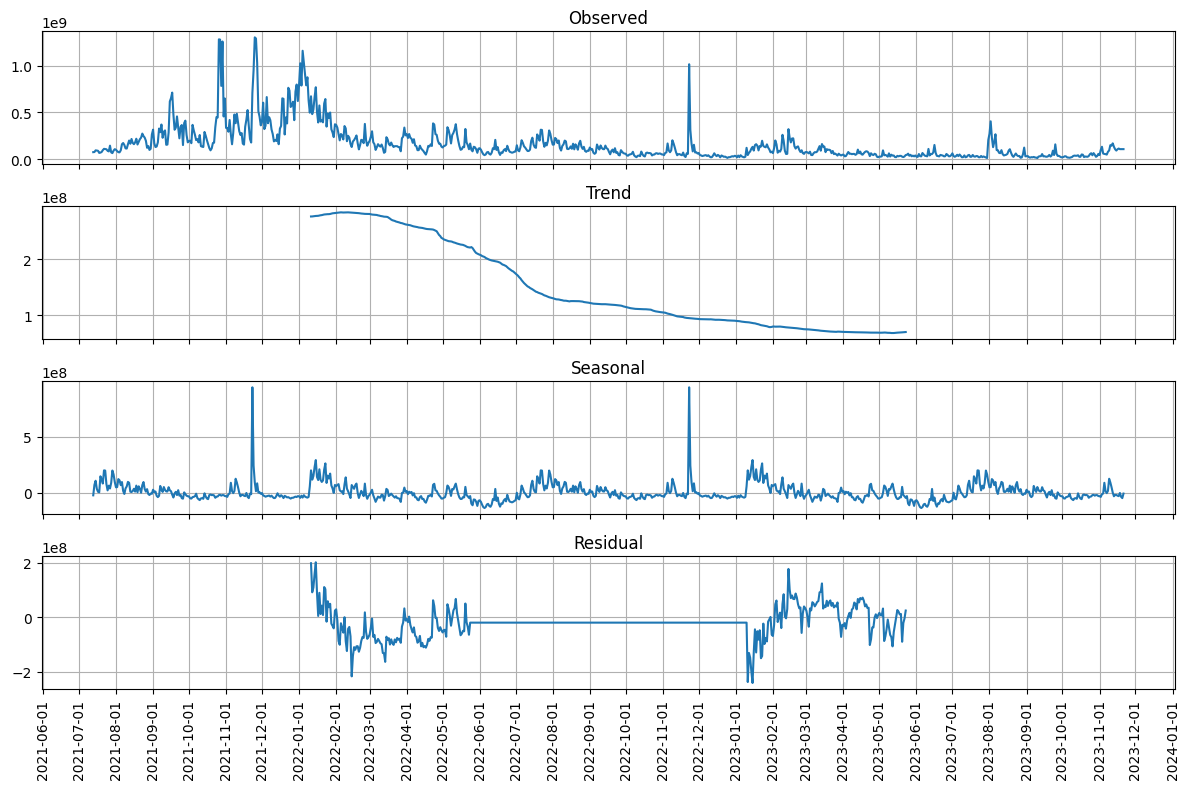

In [105]:
decomposition = seasonal_decompose(combined_df['crv_trading_volume'], model='additive', period=365)  # Change 'value' to your data column name and period to your expected seasonality
# Plot the decomposition components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

ax1.plot(decomposition.observed)
ax1.set_title('Observed')
ax1.grid(True)

ax2.plot(decomposition.trend)
ax2.set_title('Trend')
ax2.grid(True)

ax3.plot(decomposition.seasonal)
ax3.set_title('Seasonal')
ax3.grid(True)

ax4.plot(decomposition.resid)
ax4.set_title('Residual')
ax4.grid(True)

# Set the x-axis major locator to month and formatter to the default DateFormatter
ax4.xaxis.set_major_locator(mdates.MonthLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

### Decompose trading volume on CRV

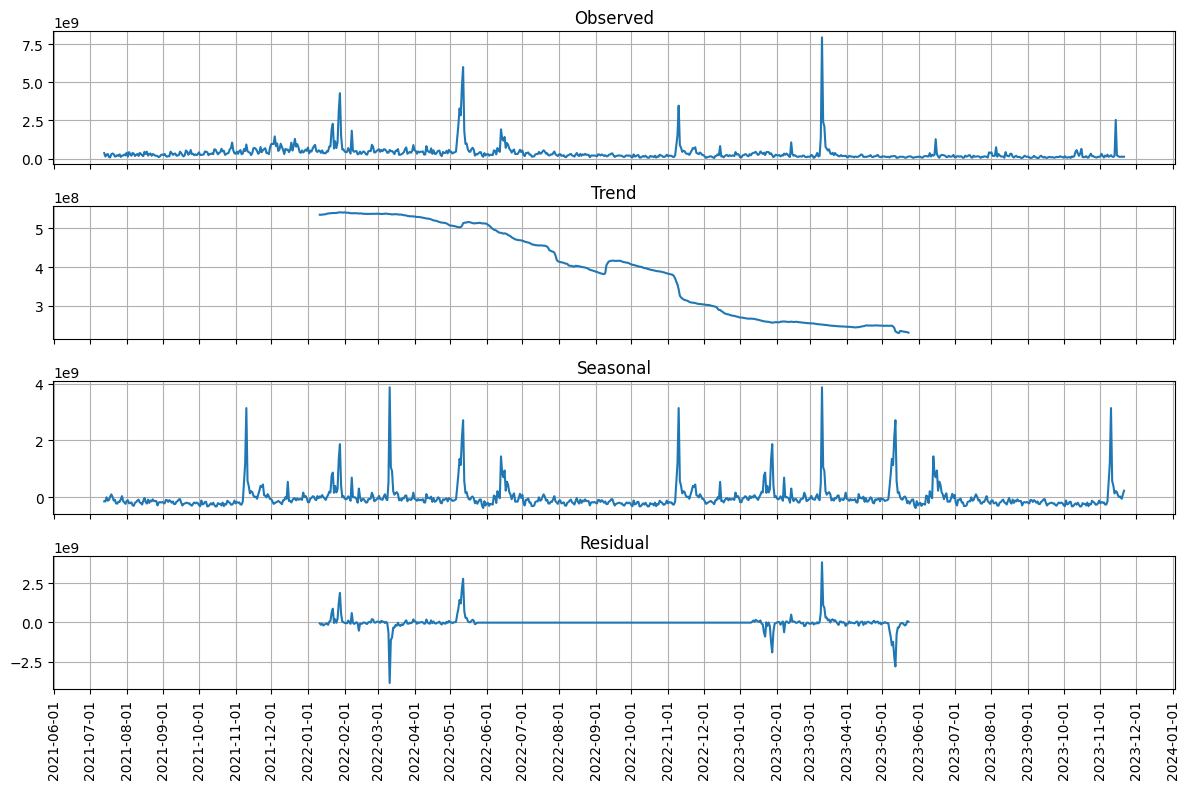

In [106]:
decomposition = seasonal_decompose(combined_df['trading_volume'], model='additive', period=365)  # Change 'value' to your data column name and period to your expected seasonality
# Plot the decomposition components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

ax1.plot(decomposition.observed)
ax1.set_title('Observed')
ax1.grid(True)

ax2.plot(decomposition.trend)
ax2.set_title('Trend')
ax2.grid(True)

ax3.plot(decomposition.seasonal)
ax3.set_title('Seasonal')
ax3.grid(True)

ax4.plot(decomposition.resid)
ax4.set_title('Residual')
ax4.grid(True)

# Set the x-axis major locator to month and formatter to the default DateFormatter
ax4.xaxis.set_major_locator(mdates.MonthLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## Decomposition of TVL

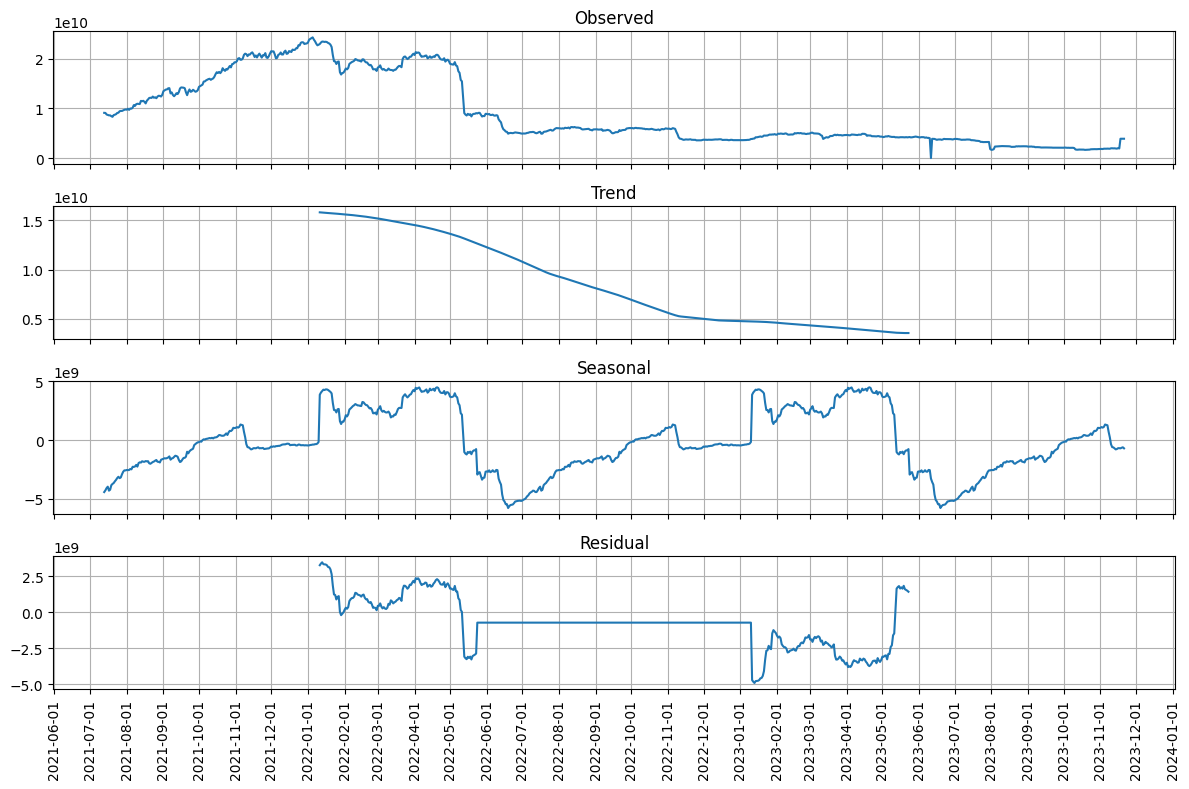

In [107]:
decomposition = seasonal_decompose(combined_df['tvl'], model='additive', period=365)  # Change 'value' to your data column name and period to your expected seasonality
# Plot the decomposition components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

ax1.plot(decomposition.observed)
ax1.set_title('Observed')
ax1.grid(True)

ax2.plot(decomposition.trend)
ax2.set_title('Trend')
ax2.grid(True)

ax3.plot(decomposition.seasonal)
ax3.set_title('Seasonal')
ax3.grid(True)

ax4.plot(decomposition.resid)
ax4.set_title('Residual')
ax4.grid(True)

# Set the x-axis major locator to month and formatter to the default DateFormatter
ax4.xaxis.set_major_locator(mdates.MonthLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## Decomposition of revenue

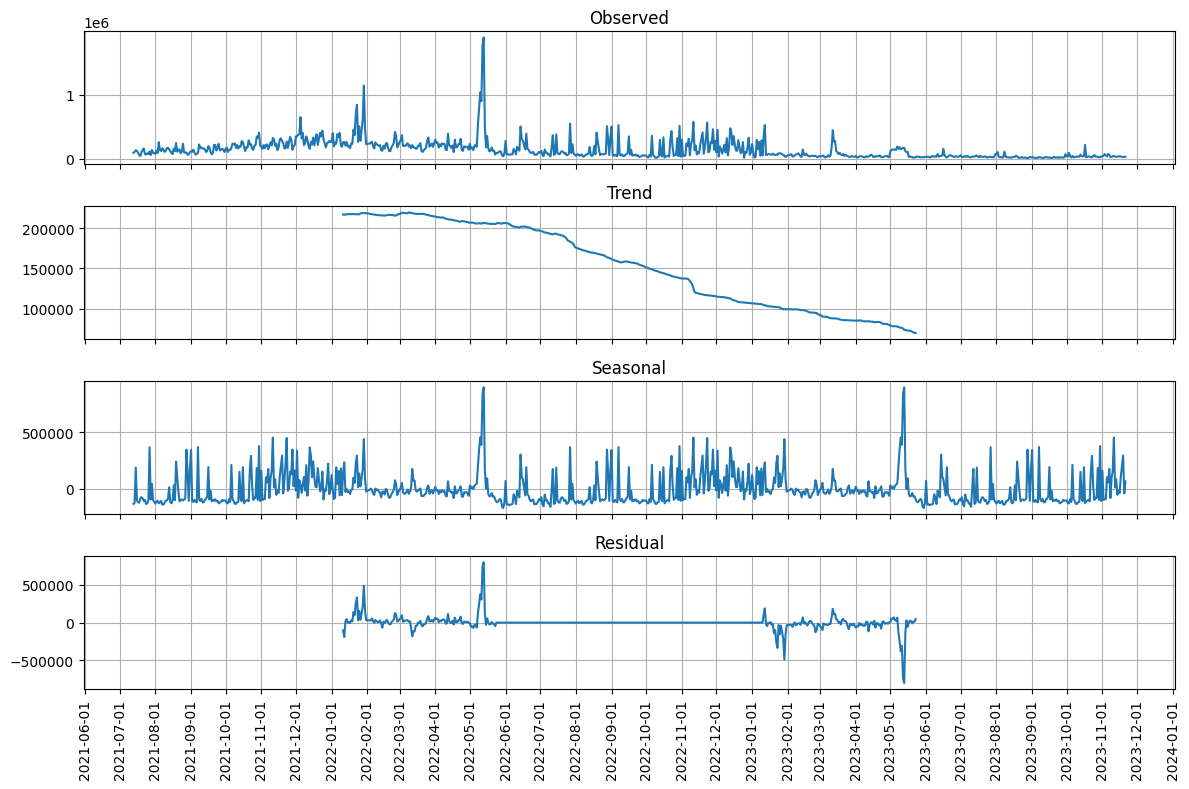

In [108]:
decomposition = seasonal_decompose(combined_df['revenue'], model='additive', period=365)  # Change 'value' to your data column name and period to your expected seasonality
# Plot the decomposition components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

ax1.plot(decomposition.observed)
ax1.set_title('Observed')
ax1.grid(True)

ax2.plot(decomposition.trend)
ax2.set_title('Trend')
ax2.grid(True)

ax3.plot(decomposition.seasonal)
ax3.set_title('Seasonal')
ax3.grid(True)

ax4.plot(decomposition.resid)
ax4.set_title('Residual')
ax4.grid(True)

# Set the x-axis major locator to month and formatter to the default DateFormatter
ax4.xaxis.set_major_locator(mdates.MonthLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

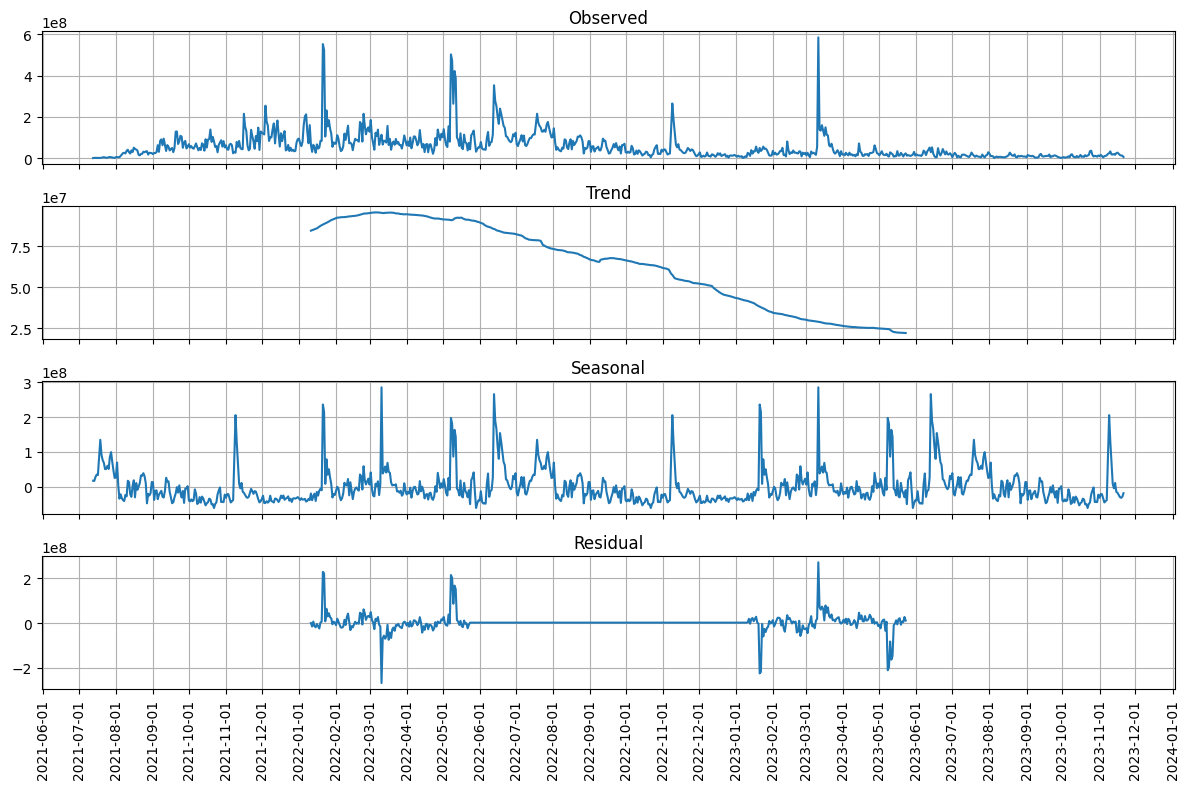

In [109]:
decomposition = seasonal_decompose(combined_df['pool_transaction_volume'], model='additive', period=365)  # Change 'value' to your data column name and period to your expected seasonality
# Plot the decomposition components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

ax1.plot(decomposition.observed)
ax1.set_title('Observed')
ax1.grid(True)

ax2.plot(decomposition.trend)
ax2.set_title('Trend')
ax2.grid(True)

ax3.plot(decomposition.seasonal)
ax3.set_title('Seasonal')
ax3.grid(True)

ax4.plot(decomposition.resid)
ax4.set_title('Residual')
ax4.grid(True)

# Set the x-axis major locator to month and formatter to the default DateFormatter
ax4.xaxis.set_major_locator(mdates.MonthLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [110]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
adf_result = adfuller(combined_df['pool_transaction_volume'].dropna())
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -4.728498338317256
p-value: 7.436907160498588e-05


ARIMA Model fitting

                                  SARIMAX Results                                  
Dep. Variable:     pool_transaction_volume   No. Observations:                  689
Model:                      ARIMA(1, 0, 1)   Log Likelihood              -13164.449
Date:                     Wed, 22 Nov 2023   AIC                          26336.898
Time:                             03:17:25   BIC                          26355.039
Sample:                         07-13-2021   HQIC                         26343.916
                              - 06-01-2023                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.557e+07   7.62e-12   8.61e+18      0.000    6.56e+07    6.56e+07
ar.L1          0.8304      0.018     46.983      0.000       0.796       0.865
ma.L1       

No frequency information was provided, so inferred frequency D will be used.
No frequency information was provided, so inferred frequency D will be used.
No frequency information was provided, so inferred frequency D will be used.


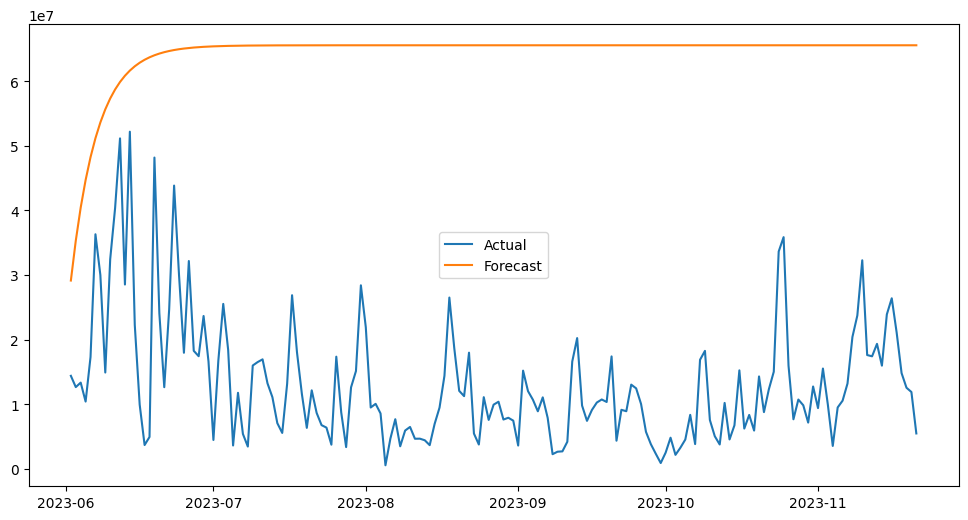

In [115]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assume `combined_df` is a DataFrame and 'pool_transaction_volume' is a column in that DataFrame
series = combined_df['pool_transaction_volume'].dropna()

# Define the training and testing dataset sizes
train_size = int(len(series) * 0.8)  # 80% of data for training, 20% for testing
train, test = series[0:train_size], series[train_size:]

# Fit ARIMA model on the training set
p = 1  # These are example values. Use your domain knowledge or iterative approach to find the best parameters.
d = 0
q = 1
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Calculate error
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

# Print summary and error
print(model_fit.summary())
print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')

# Plot the forecast against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

In [114]:
# For forecasting
# For forecasting
n_periods = 5  # specify the number of periods for forecasting

# The forecast method by default returns only the forecasted values
forecast = model_fit.forecast(steps=n_periods)

# If you want standard errors and confidence intervals, you need to use the get_forecast method instead
forecast_result = model_fit.get_forecast(steps=n_periods)
forecast_values = forecast_result.predicted_mean
stderr = forecast_result.se_mean
conf_int = forecast_result.conf_int()

print(forecast_values)
print(stderr)
print(conf_int)

2023-11-22    1.745427e+07
2023-11-23    2.260339e+07
2023-11-24    2.704747e+07
2023-11-25    3.088304e+07
2023-11-26    3.419342e+07
Freq: D, Name: predicted_mean, dtype: float64
2023-11-22    4.349590e+07
2023-11-23    4.931527e+07
2023-11-24    5.323831e+07
2023-11-25    5.598219e+07
2023-11-26    5.794172e+07
Freq: D, Name: var_pred_mean, dtype: float64
            lower pool_transaction_volume  upper pool_transaction_volume
2023-11-22                  -6.779613e+07                   1.027047e+08
2023-11-23                  -7.405277e+07                   1.192596e+08
2023-11-24                  -7.729770e+07                   1.313926e+08
2023-11-25                  -7.884004e+07                   1.406061e+08
2023-11-26                  -7.937026e+07                   1.477571e+08


No frequency information was provided, so inferred frequency D will be used.
No frequency information was provided, so inferred frequency D will be used.
Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.14701D+00    |proj g|=  3.21926D-01


 This problem is unconstrained.



At iterate    5    f=  8.99883D+00    |proj g|=  3.15024D-02

At iterate   10    f=  8.99185D+00    |proj g|=  4.16107D-03

At iterate   15    f=  8.99159D+00    |proj g|=  3.05229D-04

At iterate   20    f=  8.99156D+00    |proj g|=  1.57124D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   5.407D-06   8.992D+00
  F =   8.9915648647767110     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                      SARIMAX Results                                      
Dep. Variable:             pool_transaction_volume   No. Observations:             

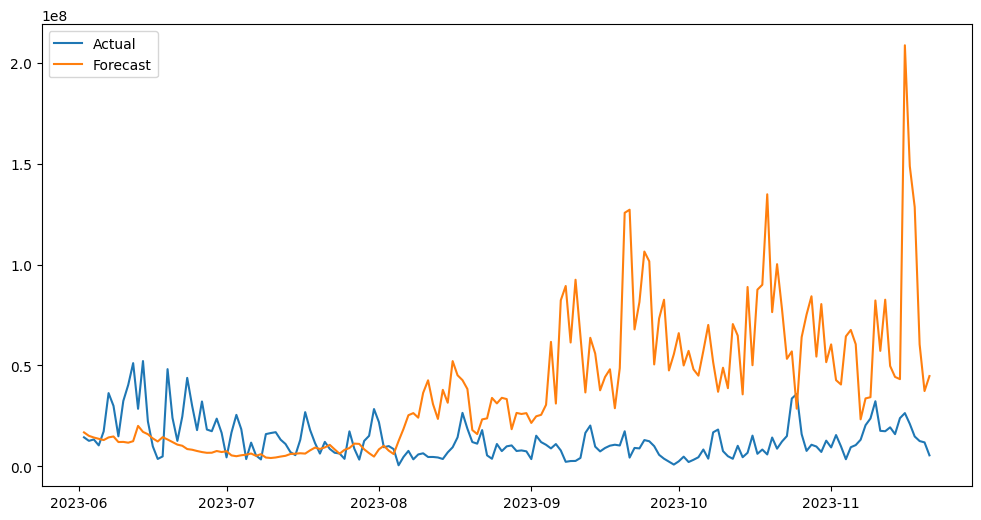

In [116]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model on the training set
# These values are just placeholders; you'll need to determine appropriate values based on your data
p = 1
d = 0
q = 1
P = 1
D = 1
Q = 1
s = 365  # assuming that 's' is 365 for daily data with yearly seasonality

sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_model_fit = sarima_model.fit()

# Make forecast with the SARIMA model
sarima_forecast = sarima_model_fit.forecast(steps=len(test))

# Calculate error
sarima_mse = mean_squared_error(test, sarima_forecast)
sarima_rmse = np.sqrt(sarima_mse)

# Print summary and error
print(sarima_model_fit.summary())
print(f'Test MSE: {sarima_mse}')
print(f'Test RMSE: {sarima_rmse}')

# Plot the forecast against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, sarima_forecast, label='Forecast')
plt.legend()
plt.show()